In [1]:
import pandas as pd
landings = pd.read_csv("air-traffic-landings-statistics.csv")

### Quick Analysis
After reading the data, I take a quick glance at it to see what kind of data I am working with.

In [2]:
landings.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000


#### Most Used Aircraft Manufacturer
The following plot shows how much the aircrafts were used from each manufacturer.

In [3]:
landings.groupby("Aircraft Manufacturer").size().plot.barh(figsize=(10,5))

According to this plot, people use Boeing Aircrafts the most. I then look at this from a different angle and get the total landing counts from each Aircraft Manufacturer.
#### Most Landings

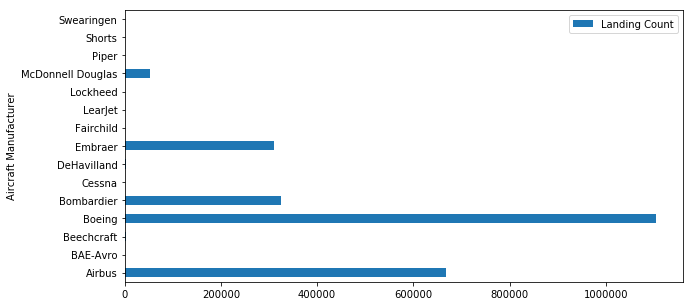

In [4]:
landings[["Aircraft Manufacturer", "Landing Count"]].groupby("Aircraft Manufacturer").agg("sum").plot.barh(figsize=(10,5))

According to this plot, Boeing has the most number of landings. These two plots show that Boeing is the most used Aircraft Manufacturer.
### Diving Deeper Into Boeing
First, I filter out all of the non-Boeing data.

In [5]:
boeing = landings[landings["Aircraft Manufacturer"] == "Boeing"]

So now the data looks like this:

In [6]:
boeing.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000
5,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,NaN,15,1605000


Then, I look at how much each of the models are used.

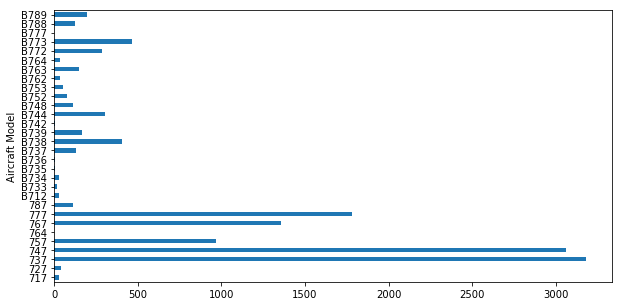

In [7]:
boeing.groupby("Aircraft Model").size().plot.barh(figsize=(10,5))

So the 737 and the 747 are the two most widely used models, both of which are over 3000 uses.